# Tensor Tutorial

In [1]:
import torch
import numpy as np

In [3]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [10]:
x_ones = torch.ones_like(x_data)
print(x_ones)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.0862, 0.3595],
        [0.9582, 0.2755]])


In [12]:
rows = cols = 2
shape = (rows, cols,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(rand_tensor,"\n", ones_tensor, "\n" , zeros_tensor)

tensor([[0.1389, 0.9679],
        [0.1971, 0.9643]]) 
 tensor([[1., 1.],
        [1., 1.]]) 
 tensor([[0., 0.],
        [0., 0.]])


In [17]:
tensor = torch.rand(3,4)
print(tensor)
print(tensor.dtype)
print(tensor.device)

tensor([[0.3629, 0.6839, 0.0896, 0.3224],
        [0.9970, 0.4179, 0.0597, 0.1662],
        [0.0100, 0.2294, 0.0793, 0.1472]])
torch.float32
cpu


In [19]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(tensor.device)

cuda:0


In [20]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.3629, 0.6839, 0.0896, 0.3224, 0.3629, 0.6839, 0.0896, 0.3224, 0.3629,
         0.6839, 0.0896, 0.3224],
        [0.9970, 0.4179, 0.0597, 0.1662, 0.9970, 0.4179, 0.0597, 0.1662, 0.9970,
         0.4179, 0.0597, 0.1662],
        [0.0100, 0.2294, 0.0793, 0.1472, 0.0100, 0.2294, 0.0793, 0.1472, 0.0100,
         0.2294, 0.0793, 0.1472]], device='cuda:0')


In [21]:
mul = tensor.mul(tensor) # * works as well
print(mul)

tensor([[1.3170e-01, 4.6773e-01, 8.0212e-03, 1.0391e-01],
        [9.9407e-01, 1.7468e-01, 3.5598e-03, 2.7630e-02],
        [1.0031e-04, 5.2619e-02, 6.2816e-03, 2.1669e-02]], device='cuda:0')


In [23]:
matmul = tensor.matmul(tensor.T) # @ works as well
print(matmul)

tensor([[0.7114, 0.7066, 0.2151],
        [0.7066, 1.1999, 0.1351],
        [0.2151, 0.1351, 0.0807]], device='cuda:0')


In [24]:
tensor.add_(5)
print(tensor)

tensor([[5.3629, 5.6839, 5.0896, 5.3224],
        [5.9970, 5.4179, 5.0597, 5.1662],
        [5.0100, 5.2294, 5.0793, 5.1472]], device='cuda:0')


In [26]:
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [27]:
t.add_(10)
print(t)
print(n)

tensor([11., 11., 11., 11., 11.])
[11. 11. 11. 11. 11.]


In [28]:
n = np.ones(5)
print(n)
t = torch.from_numpy(n)
print(t)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [29]:
np.add(n,1, out=n)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


# Intro to torch AutoGrad

In [30]:
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Moaz Tahir/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.52MB/s]


In [31]:
#Forward Pass
pred = model(data)

In [34]:
#Loss calc and back propogation
loss = (pred - labels).sum()
loss.backward()

In [35]:
#Optimizer load
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [36]:
#Init Grad descent
optim.step()

# Neural Networks

In [50]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*5 from image dimension
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [51]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [52]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0519, -0.0451, -0.0138, -0.0622,  0.0158,  0.0342,  0.0594, -0.0281,
         -0.0367, -0.0714]], grad_fn=<AddmmBackward0>)


In [53]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [54]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5662, grad_fn=<MseLossBackward0>)


In [55]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [56]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0184, -0.0015, -0.0016, -0.0021, -0.0074,  0.0058])


In [57]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [58]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# TRAINING A CLASSIFIER


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

c:\Users\Moaz Tahir\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

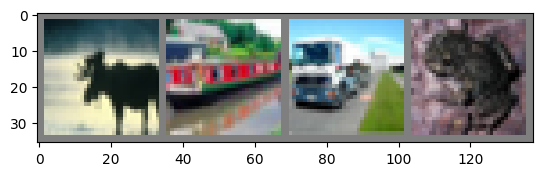

deer  ship  truck frog 


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.132
[1,  4000] loss: 1.815
[1,  6000] loss: 1.677
[1,  8000] loss: 1.590
[1, 10000] loss: 1.527
[1, 12000] loss: 1.492
[2,  2000] loss: 1.397
[2,  4000] loss: 1.380
[2,  6000] loss: 1.354
[2,  8000] loss: 1.314
[2, 10000] loss: 1.329
[2, 12000] loss: 1.281
Finished Training


In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

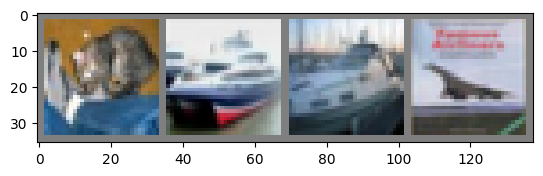

GroundTruth:  cat   ship  ship  plane


In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   plane ship  ship 


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.5 %
Accuracy for class: car   is 77.7 %
Accuracy for class: bird  is 38.6 %
Accuracy for class: cat   is 42.2 %
Accuracy for class: deer  is 39.1 %
Accuracy for class: dog   is 33.6 %
Accuracy for class: frog  is 56.5 %
Accuracy for class: horse is 67.4 %
Accuracy for class: ship  is 67.5 %
Accuracy for class: truck is 56.1 %


In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [23]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
inputs, labels = data[0].to(device), data[1].to(device)